In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats

import octopus as oct

In [2]:
filenames =['R38G02_GC6f_1s3p008_2020-06-11_15.35_1s3p_Ftrace_mean',
            'R38G02_GC6f_1s3p001_2020-06-14_17.15_1s3p_Ftrace_mean',
            'R38G02_GC6f002_2020-06-22_13.55_1s3p_Ftrace_mean',
            'R38G02_GC6f006_2020-06-22_15.22_1s3p_Ftrace_mean',
            'R38G02_GC6f007_2020-06-22_16.31_1s3p_Ftrace_mean',
            'R38G02_GC6f012_2020-06-22_18.44_1s3p_Ftrace_mean',
            'R38G02_GC6f001_2020-06-23_14.20_1s3p_Ftrace_mean',
            'R38G02_GC6f010_2020-07-07_15.28_1s3p_Ftrace_mean',
            'R38G02_GC6f004_2020-07-10_12.37_1s3p_Ftrace_mean',
            'R38G02_GC6f_005_2020-07-16_11.34_1s3p_Ftrace_mean',
            'R38G02_GC6f_SINGalldir_001_2021-03-02_12.22_Ftrace_mean',
            '2022_07_12_R38G02_GC6f_SING_006_2022-07-12_16.15_Ftrace_mean_SINGalldir',
            '2022_07_15_R38G02_GC6f_SING_004_2022-07-15_12.20_Ftrace_mean_SINGalldir',
            '2022_07_19_R38G02_GC6f_SING_006_2022-07-19_15.46_Ftrace_mean_SINGalldir',
            '2022_07_20_R38G02_GC6f_SING_001_2022-07-20_10.32_Ftrace_mean_SINGalldir',
            '2022_07_20_R38G02_GC6f_SING_012_2022-07-20_13.50_Ftrace_mean_SINGalldir']

In [3]:
len(filenames)

16

In [4]:
# Import Data
time = np.load('time_1s3p.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)   

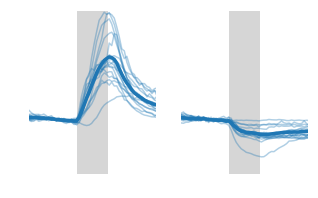

In [5]:
fig = plt.figure(figsize = (5,3))

ax = fig.add_subplot(121)
plt.plot(time,Ftrace_all[:,6,:], color = 'C0', alpha = 0.35, linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all[:,6,:], axis=1), color = 'C0', linewidth = 3.5)
plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-2.5,5])
plt.axis('off') 

ax = fig.add_subplot(122)
plt.plot(time,Ftrace_all[:,2,:], color = 'C0', alpha = 0.35, linewidth = 1.5)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C0', linewidth = 3.5)
plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-2.5,5])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigS2_R38G02_GC6f_Ftraces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [6]:
rotations = [0,45,90,135,180,225,270,315,360]
Ftrace_mean = np.zeros([len(rotations),len(filenames)])
Ftrace_sem = np.zeros([len(rotations)])
for i in range(len(rotations)):
    Ftrace_sem[i] = stats.sem(np.mean(Ftrace_all[38:63,i,:],0))
    for j in range(len(filenames)):
        Ftrace_mean[i,j] = np.mean(Ftrace_all[np.int(np.where(time == 0)[0]):63,i,j])

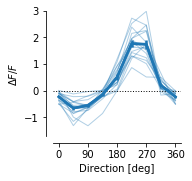

In [7]:
fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT directional tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(rotations, Ftrace_mean, color='C0', linewidth = 1, zorder = 0, alpha=0.35)
plt.plot(rotations, np.mean(Ftrace_mean,1), linewidth = 2.5, color = 'C0')
plt.errorbar(rotations, np.mean(Ftrace_mean,1), yerr = Ftrace_sem, linewidth = 2.5, color = 'C0')

#plt.plot(rotations, R38G02_GC6f_Ftrace_mean, color='C0', linewidth = 1, zorder = 0, alpha=0.3)
#plt.plot(rotations, np.mean(R38G02_GC6f_Ftrace_mean,1), linewidth = 2, color = 'C0')
#plt.errorbar(rotations, np.mean(R38G02_GC6f_Ftrace_mean,1), yerr = stats.sem(R38G02_GC6f_Ftrace_mean,1), linewidth = 2, color = 'C0')

plt.xticks(rotations)
ax.set_xticklabels(rotations)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
#for axis in ['top','bottom','left','right']:
#  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel('Direction [deg]', fontsize = 10)
ax.set_ylabel('$\Delta F/F$', fontsize = 10)
xticks = np.array([0,90,180,270,360])
ax.set_xticklabels(xticks, size=10)
ax.set_xticks(xticks)
plt.ylim([-1.7,3])
ax.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigS2_R38G02_GC6f_DirTuning.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()